<h1><center>Mechanisms of Action (MoA) in Pyspark.</center></h1>

<center><img src="https://pharmacyinnovations.net/wp-content/uploads/pillsdrugs.png"></center>


<div class="list-group" id="list-tab" role="tablist">
<h2 class="list-group-item list-group-item-action active" data-toggle="list" style='background:blue; border:0; color:white' role="tab" aria-controls="home"><center>Quick navigation</center></h2>

* [1. Basic Data Overview](#1)
* [2. Categories visualization](#2)
* [3. Gene and cell features distribution](#3)
* [4. Training features correlation](#4)
* [5. Targets analysis](#5)
* [6. Train & Targets correlations](#6)
* [7. Pyspark Prediction](#7)


In [4]:
import numpy as np
import pandas as pd
import random

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import matplotlib.pyplot as plt

PLEASE CHANGE THIS TO YOUR SETTING

In [5]:
pd.options.display.max_columns = None
# which folder does your data locate?
file_path = './'

<a id="1"></a>
<h2 style='background:blue; border:0; color:white'><center>1. Basic Data Overview</center><h2>

In [6]:
train = pd.read_csv(file_path + 'train_features.csv')
test = pd.read_csv(file_path + 'test_features.csv')

train['dataset'] = 'train'
test['dataset'] = 'test'

df = pd.concat([train, test])

Take a look into training and test sets.

In [7]:
print('Number of rows in training set:', train.shape[0])
print('Number of columns in training set:', train.shape[1] - 1)

print('Number of rows in test set:', test.shape[0])
print('Number of columns in test set:', test.shape[1] - 1)

Number of rows in training set: 23814
Number of columns in training set: 876
Number of rows in test set: 3982
Number of columns in test set: 876


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27796 entries, 0 to 3981
Columns: 877 entries, sig_id to dataset
dtypes: float64(872), int64(1), object(4)
memory usage: 186.2+ MB


We can see that we have 872 float features 1 integer (cp_time) and 3 categorical (sig_id, cp_type and cp_dose).

<a id="2"></a>
<h2 style='background:blue; border:0; color:white'><center>2. Categories Visualization</center><h2>

Here we are going to check categorical features: cp_type, cp_time, cp_dose.


In [9]:
cp_width = 500
cp_height = 400
scatter_size = 600
WIDTH=800

In [10]:
ds = df[df['dataset']=='train']
ds = ds.groupby(['cp_type', 'cp_time', 'cp_dose'])['sig_id'].count().reset_index()

ds.columns = [
    'cp_type', 
    'cp_time', 
    'cp_dose', 
    'count'
]

fig = px.sunburst(
    ds, 
    path=[
        'cp_type',
        'cp_time',
        'cp_dose' 
    ], 
    values='count', 
    title='Distribution chart for all cp_type/cp_time/cp_dose',
    width=500,
    height=500
)

fig.show()

<a id="3"></a>
<h2 style='background:blue; border:0; color:white'><center>3. Gene and cell features distribution</center><h2>

Some distribution of randomly selected columns.

In [11]:
train_columns = train.columns.to_list()

g_list = [i for i in train_columns if i.startswith('g-')]

c_list = [i for i in train_columns if i.startswith('c-')]

In [12]:
import matplotlib.pyplot as plt
import numpy as np

def matrix_plot(data):
    fig, ax = plt.subplots(figsize=(18, 18))
    # Using matshow here just because it sets the ticks up nicely. imshow is faster.
    ax.matshow(data, cmap='RdBu')

    for (i, j), z in np.ndenumerate(data):
        ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center', fontsize=15,
                bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.3'))

    plt.xticks(
        range(data.shape[1]), 
        data.columns, 
        fontsize=18, 
        rotation=50
    )

    plt.yticks(
        range(data.shape[1]), 
        data.columns, 
        fontsize=18
    )

    plt.show()

def ramdom_corr_plot(df, columns, size, seed=6):
    random.seed(seed)
    sampled_list = sorted(random.sample(columns, size), key=lambda v: int(v.split('-')[1]))
    random_df = df[sampled_list]
    matrix_plot(random_df.corr())

g- feature Correlations

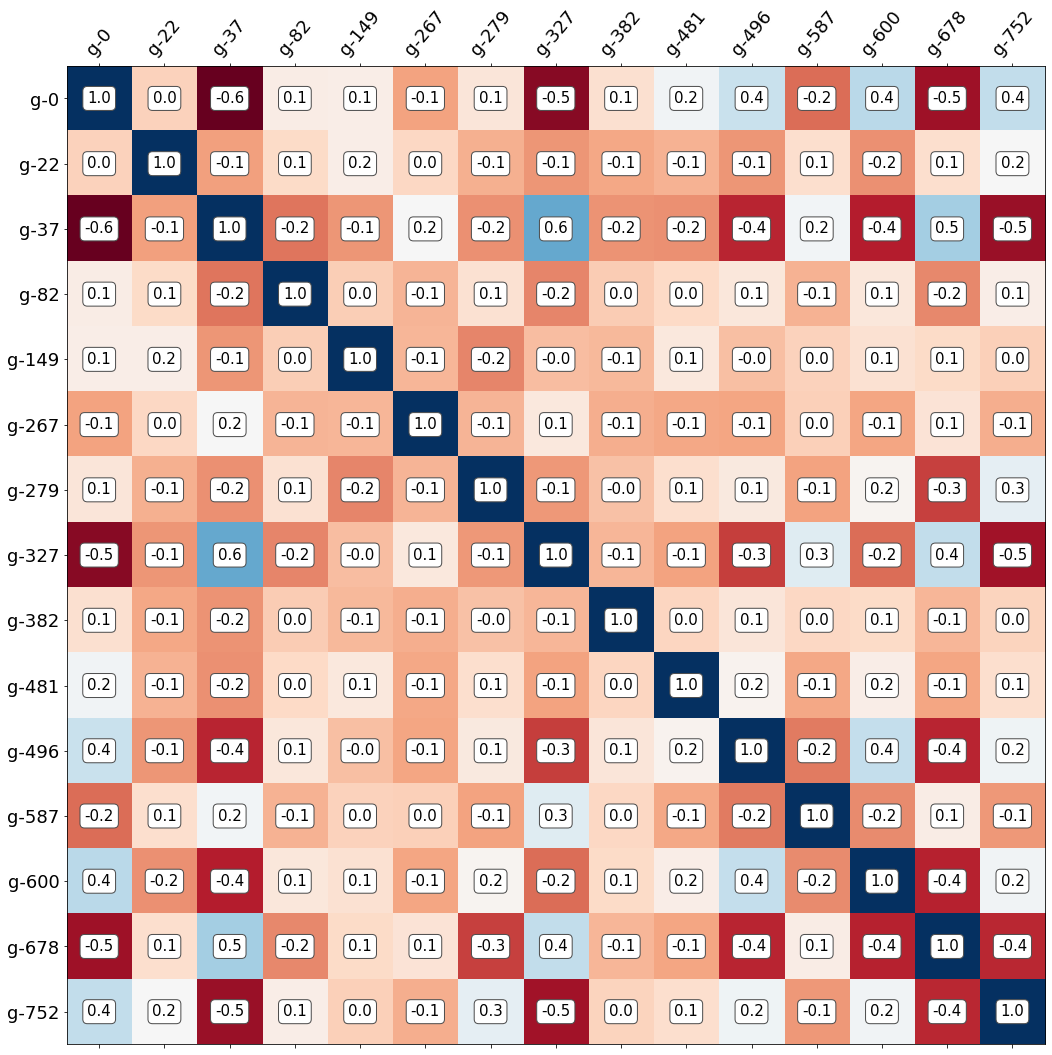

In [13]:
ramdom_corr_plot(train, g_list, 15)

c- feature Correlations

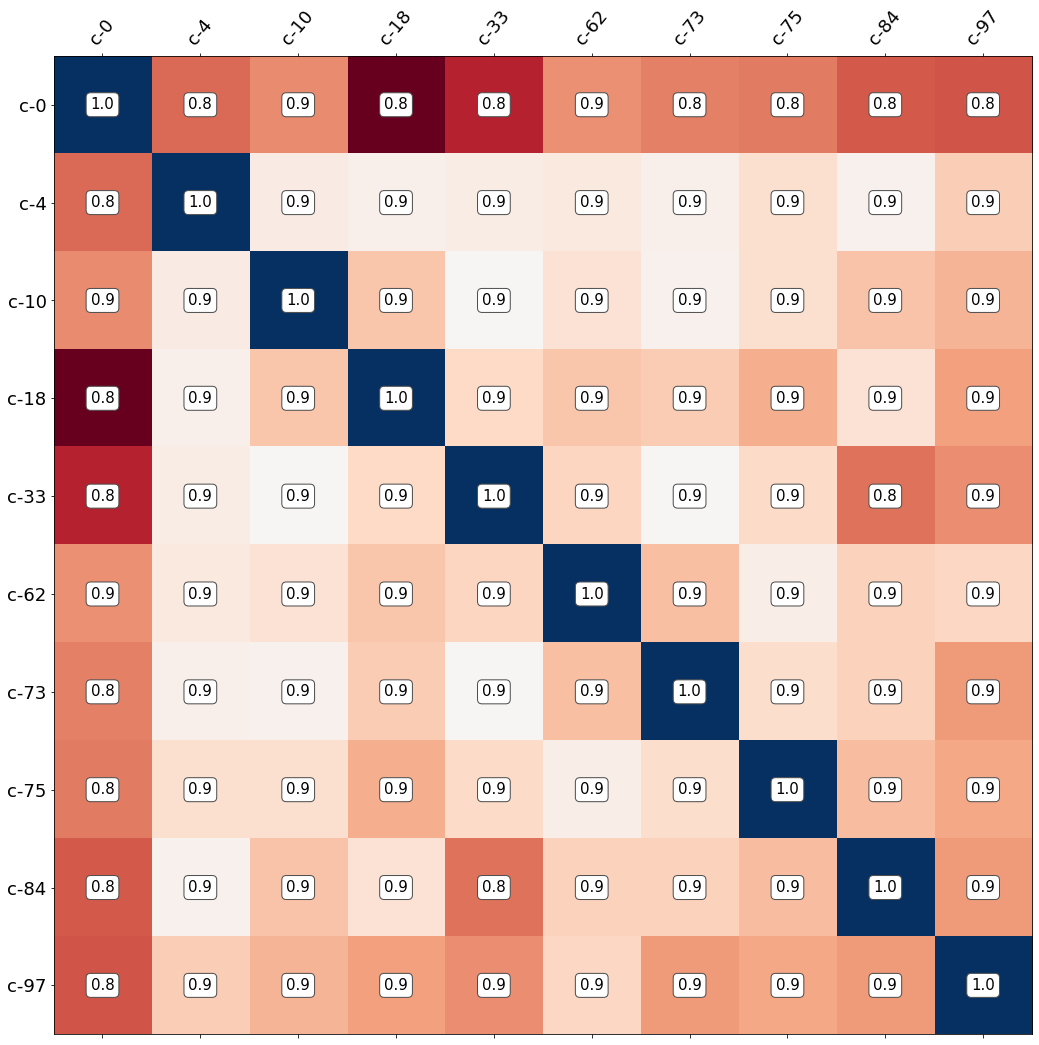

In [14]:
ramdom_corr_plot(train, c_list, 10)

In [36]:
from sklearn.decomposition import PCA
def variance_explain(df, features):
    pca = PCA().fit(df[features])
    cumulate_var = np.cumsum(pca.explained_variance_ratio_)
    print("explained variance ratio")
    print(pca.explained_variance_ratio_)
    plt.plot(cumulate_var)
    plt.xlabel('number of components')
    plt.ylabel('cumulative explained variance');
    
    # Get the PCA components (loadings)
    PCs = pca.components_
    # Use quiver to generate the basic plot
    fig = plt.figure()
    plt.quiver(np.zeros(PCs.shape[1]), np.zeros(PCs.shape[1]),
            PCs[0,:], PCs[1,:], 
            angles='xy', scale_units='xy', scale=1)

    # Ensure correct aspect ratio and axis limits
    #plt.axis('equal')
    plt.xlim([-0.2,0.2])
    plt.ylim([-0.2,0.2])

    # Label axes
    plt.xlabel('PC 1')
    plt.ylabel('PC 2')

    # Done
    plt.show()

Fit a PCA model on g- features

explained variance ratio
[2.97345081e-01 4.67629033e-02 3.04739162e-02 2.70455383e-02
 2.16400385e-02 1.99412958e-02 1.75131723e-02 1.66522442e-02
 1.22018313e-02 1.08140576e-02 9.94581003e-03 9.19775651e-03
 7.77048806e-03 7.59964710e-03 7.33636357e-03 7.06411694e-03
 6.38444148e-03 6.11625939e-03 5.71435511e-03 5.19872382e-03
 4.88769673e-03 4.41385630e-03 4.25219327e-03 3.96798410e-03
 3.76948572e-03 3.55868151e-03 3.46613393e-03 3.35595479e-03
 3.19860205e-03 2.96499385e-03 2.89224702e-03 2.88300409e-03
 2.84892081e-03 2.72705370e-03 2.64272742e-03 2.58220974e-03
 2.51929107e-03 2.38236397e-03 2.35685124e-03 2.27864297e-03
 2.22764628e-03 2.16033749e-03 2.11965643e-03 2.08752286e-03
 2.07238469e-03 2.02734971e-03 2.00894438e-03 1.91485424e-03
 1.90328223e-03 1.85439905e-03 1.82886354e-03 1.81007041e-03
 1.74690194e-03 1.71639643e-03 1.69112370e-03 1.67391364e-03
 1.66430636e-03 1.64949154e-03 1.64425893e-03 1.61608154e-03
 1.60015732e-03 1.55195440e-03 1.54363400e-03 1.52450150e-03

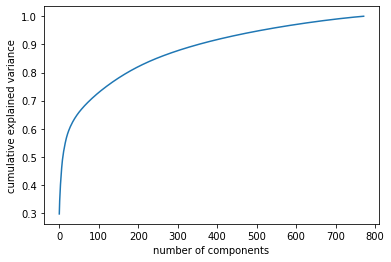

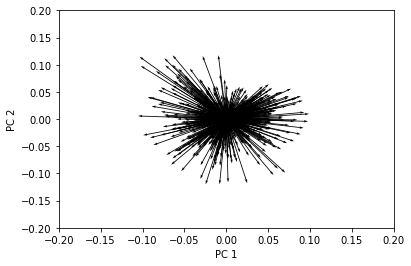

In [37]:
variance_explain(train, g_list)

Fit a PCA model on c- features

explained variance ratio
[8.48538094e-01 1.13789993e-02 7.96738045e-03 5.65078074e-03
 4.44798724e-03 3.78098699e-03 3.65504992e-03 3.31627158e-03
 3.08031144e-03 2.94704085e-03 2.57413208e-03 2.27950789e-03
 2.15416105e-03 2.10659322e-03 2.00807142e-03 1.91894164e-03
 1.89541147e-03 1.87945701e-03 1.81304883e-03 1.79408320e-03
 1.67630102e-03 1.59119069e-03 1.55668199e-03 1.53758539e-03
 1.49088306e-03 1.48666863e-03 1.47740364e-03 1.45677949e-03
 1.43782883e-03 1.40926938e-03 1.37286128e-03 1.36123213e-03
 1.34751234e-03 1.33167950e-03 1.31549520e-03 1.30057701e-03
 1.28039166e-03 1.27086413e-03 1.26806106e-03 1.24445763e-03
 1.23236585e-03 1.22482333e-03 1.21557767e-03 1.19873571e-03
 1.19341631e-03 1.18669090e-03 1.18007816e-03 1.16582745e-03
 1.15464002e-03 1.15315240e-03 1.13862872e-03 1.13356664e-03
 1.11229552e-03 1.10864572e-03 1.09645465e-03 1.09358069e-03
 1.08509575e-03 1.08132369e-03 1.06772733e-03 1.06496503e-03
 1.05759723e-03 1.05565394e-03 1.04834595e-03 1.03779713e-03

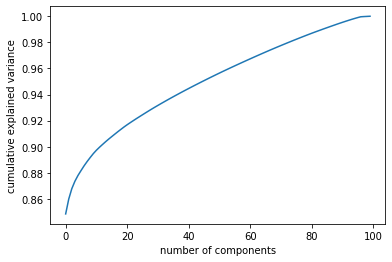

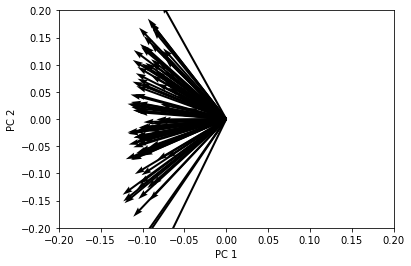

In [38]:
variance_explain(train, c_list)

<a id="5"></a>
<h2 style='background:blue; border:0; color:white'><center>5. Targets analysis</center><h2>

Let's check targets.

In [27]:
train_target = pd.read_csv(file_path+"train_targets_scored.csv")

print('Number of rows: ', train_target.shape[0])
print('Number of cols: ', train_target.shape[1])

train_target.head()

Number of rows:  23814
Number of cols:  207


sig_id  5-alpha_reductase_inhibitor  11-beta-hsd1_inhibitor  \
0  id_000644bb2                            0                       0   
1  id_000779bfc                            0                       0   
2  id_000a6266a                            0                       0   
3  id_0015fd391                            0                       0   
4  id_001626bd3                            0                       0   

   acat_inhibitor  acetylcholine_receptor_agonist  \
0               0                               0   
1               0                               0   
2               0                               0   
3               0                               0   
4               0                               0   

   acetylcholine_receptor_antagonist  acetylcholinesterase_inhibitor  \
0                                  0                               0   
1                                  0                               0   
2                                  0                               0   
3                                  0                               0   
4                                  0                               0   

   adenosine_receptor_agonist  adenosine_receptor_antagonist  \
0                           0                              0   
1                           0                              0   
2                           0                              0   
3                           0                              0   
4                           0                              0   

   adenylyl_cyclase_activator  adrenergic_receptor_agonist  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   

   adrenergic_receptor_antagonist  akt_inhibitor  \
0                               0              0   
1                               0              0   
2                               0              0   
3                               0              0   
4                               0              0   

   aldehyde_dehydrogenase_inhibitor  alk_inhibitor  ampk_activator  analgesic  \
0                                 0              0               0          0   
1                                 0              0               0          0   
2                                 0              0               0          0   
3                                 0              0               0          0   
4                                 0              0               0          0   

   androgen_receptor_agonist  androgen_receptor_antagonist  \
0                          0                             0   
1                          0                             0   
2                          0                             0   
3                          0                             0   
4                          0                             0   

   anesthetic_-_local  angiogenesis_inhibitor  \
0                   0                       0   
1                   0                       0   
2                   0                       0   
3                   0                       0   
4                   0                       0   

   angiotensin_receptor_antagonist  anti-inflammatory  antiarrhythmic  \
0                                0                  0               0   
1                                0                  0               0   
2                                0                  0               0   
3                                0                  0               0   
4                                0                  0               0   

   antibiotic  anticonvulsant  antifungal  antihistamine  antimalarial  \
0           0               0           0              0             0   
1          

In [19]:
Distribution of active targets

SyntaxError: invalid syntax (<ipython-input-19-ad8de82ac410>, line 1)

In [20]:
data = train_target.drop(['sig_id'], axis=1).astype(bool).sum(axis=1).reset_index()
WIDTH=800
data.columns = [
    'row', 
    'count'
]

data = data.groupby(['count'])['row'].count().reset_index()

fig = px.pie(
    data, 
    values=100 * data['row'] / len(train_target), 
    names="count", 
    title='Number of activations in targets for every sample (Percent)', 
    width=WIDTH, 
    height=500
)

fig.show()

Correlations of targets

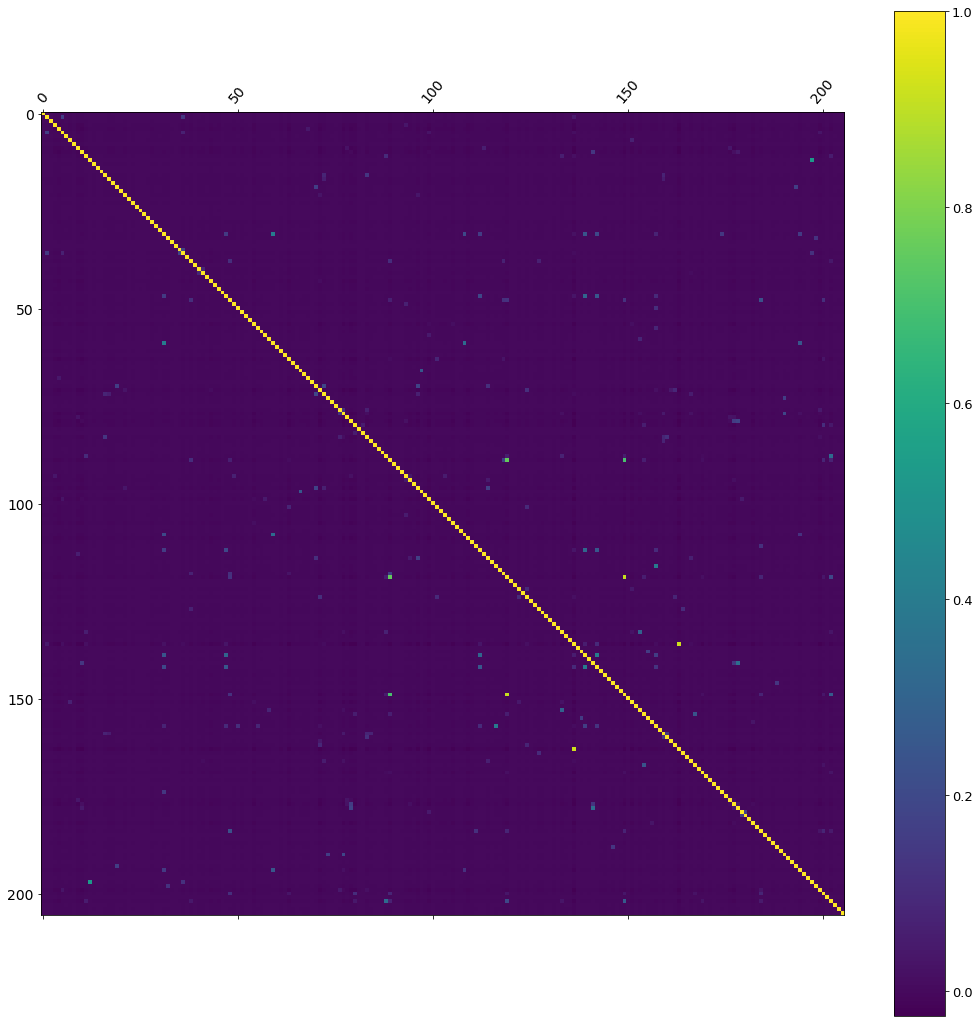

In [21]:
data = train_target.drop(columns=['sig_id'])
f = plt.figure(
    figsize=(18, 18)
)

plt.matshow(
    data.corr(), 
    fignum=f.number
)

plt.xticks(
    fontsize=14, 
    rotation=50
)

plt.yticks(
    fontsize=14
)

cb = plt.colorbar()
cb.ax.tick_params(
    labelsize=13
)

plt.show()

<a id="6"></a>
<h2 style='background:blue; border:0; color:white'><center>6. Train & Targets correlations</center><h2>

In [22]:
correlation_matrix = pd.DataFrame()
columns = g_list + c_list
for t_col in train_target.columns:
    corr_list = list()
    if t_col == 'sig_id':
        continue
    for col in columns:
        res = train[col].corr(train_target[t_col])
        corr_list.append(res)
    correlation_matrix[t_col] = corr_list

And we have large correlation matrix.

In [23]:
correlation_matrix['train_features'] = columns
correlation_matrix = correlation_matrix.set_index('train_features')

correlation_matrix

5-alpha_reductase_inhibitor  11-beta-hsd1_inhibitor  \
train_features                                                        
g-0                               -0.008317               -0.011513   
g-1                               -0.004291               -0.004084   
g-2                                0.000719               -0.002585   
g-3                               -0.008268               -0.002384   
g-4                               -0.003799                0.002661   
...                                     ...                     ...   
c-95                               0.010113                0.004202   
c-96                               0.008570                0.008131   
c-97                               0.009440                0.003168   
c-98                               0.013253                0.010387   
c-99                               0.008512                0.007679   

                acat_inhibitor  acetylcholine_receptor_agonist  \
train_features                                                   
g-0                   0.003049                       -0.019100   
g-1                  -0.000265                       -0.005629   
g-2                  -0.004516                       -0.004385   
g-3                   0.001146                       -0.007750   
g-4                   0.006287                       -0.010288   
...                        ...                             ...   
c-95                  0.003092                        0.022601   
c-96                  0.010796                        0.019768   
c-97                  0.009347                        0.021624   
c-98                  0.010546                        0.030946   
c-99                  0.013209                        0.021847   

                acetylcholine_receptor_antagonist  \
train_features                                      
g-0                                     -0.034001   
g-1                                      0.004920   
g-2                                     -0.016947   
g-3                                     -0.010446   
g-4                                     -0.010128   
...                                           ...   
c-95                                     0.029189   
c-96                                     0.029630   
c-97                                     0.026226   
c-98                                     0.035763   
c-99                                     0.027331   

                acetylcholinesterase_inhibitor  adenosine_receptor_agonist  \
train_features                                                               
g-0                                  -0.009239                   -0.019205   
g-1                                   0.009246                   -0.003603   
g-2                                   0.002133                   -0.002664   
g-3                                  -0.013589                   -0.002952   
g-4                                  -0.009890                   -0.007749   
...                                        ...                         ...   
c-95                                  0.014921                    0.016299   
c-96                                  0.012617                    0.012412   
c-97                                  0.016902                    0.013411   
c-98                                  0.019600                    0.020482   
c-99                                  0.011645                    0.011836   

                adenosine_receptor_antagonist  adenylyl_cyclase_activator  \
train_features                                                              
g-0                                 -0.011048                   -0.008982   
g-1                                  0.006332                   -0.001601   
g-2                                 -0.009920                    0.003295   
g-3                                 -0.002539                    0.006999   
g-4                                 -0.003269                   -0

Let's see what is the higher value (absolute) of correlation for target columns with every column from train set. Every column on chart is max correlation of current target column with all of columns from training set.

In [24]:
maxCol=lambda x: max(x.min(), x.max(), key=abs)

high_scores = correlation_matrix.apply(maxCol, axis=0).reset_index()

high_scores.columns = [
    'column', 
    'best_correlation'
]
high_scores

column  best_correlation
0              5-alpha_reductase_inhibitor         -0.028704
1                   11-beta-hsd1_inhibitor         -0.018517
2                           acat_inhibitor         -0.018810
3           acetylcholine_receptor_agonist         -0.033727
4        acetylcholine_receptor_antagonist         -0.042654
..                                     ...               ...
201  ubiquitin_specific_protease_inhibitor          0.017409
202                        vegfr_inhibitor         -0.082568
203                              vitamin_b         -0.027648
204             vitamin_d_receptor_agonist          0.054114
205                          wnt_inhibitor         -0.018135

[206 rows x 2 columns]

Now let's see what columns from training set have the higher number of "high" correlations with target columns. Every row from chart means that column `A` `N` times has the best value of correlation with different target columns. 

In [25]:
col_df = pd.DataFrame()
tr_cols = list()
tar_cols = list()

for col in correlation_matrix.columns:
    tar_cols.append(col)
    tr_cols.append(
        correlation_matrix[col].abs().sort_values(ascending=False).reset_index()['train_features'].head(1).values[0]
    )

col_df['column'] = tar_cols
col_df['train_best_column'] = tr_cols

total_scores = pd.merge(high_scores, col_df)

total_scores

column  best_correlation train_best_column
0              5-alpha_reductase_inhibitor         -0.028704             g-211
1                   11-beta-hsd1_inhibitor         -0.018517             g-571
2                           acat_inhibitor         -0.018810             g-350
3           acetylcholine_receptor_agonist         -0.033727              g-91
4        acetylcholine_receptor_antagonist         -0.042654             g-392
..                                     ...               ...               ...
201  ubiquitin_specific_protease_inhibitor          0.017409              g-18
202                        vegfr_inhibitor         -0.082568              c-98
203                              vitamin_b         -0.027648             g-356
204             vitamin_d_receptor_agonist          0.054114             g-627
205                          wnt_inhibitor         -0.018135             g-252

[206 rows x 3 columns]

Rank features

In [26]:
count_features = total_scores['train_best_column'].value_counts().reset_index().sort_values('train_best_column')

count_features.columns = [
    'column', 
    'count'
]

count_features = count_features.tail(33)

fig = px.bar(
    count_features, 
    x='count', 
    y="column", 
    orientation='h', 
    title='Columns from training set with number of high correlations with target columns', 
    width=WIDTH,
    height=700
)

fig.show()

<a id="7"></a>
<h2 style='background:blue; border:0; color:white'><center>7. Pyspark Prediction </center><h2>

In [1]:
# allocate memory
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .master('local[*]') \
    .config("spark.driver.memory", "32g") \
    .appName('my-cool-app') \
    .getOrCreate()

In [2]:
import os
import re
from functools import reduce
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#PLEASE COMMENTOUT THIS PART IF YOU RUN ON DATABRICKS
######################################################
import findspark
os.environ['SPARK_HOME'] = 'C:\\Users\\msi\\Desktop\\spark\\spark-3.0.1-bin-hadoop3.2'
findspark.init()
exec(open(os.path.join(os.environ["SPARK_HOME"], 'python/pyspark/shell.py')).read())
#####################################################

Welcome to
      ____              __
     / __/__  ___ _____/ /__
    _\ \/ _ \/ _ `/ __/  '_/
   /__ / .__/\_,_/_/ /_/\_\   version 3.0.1
      /_/

Using Python version 3.8.3 (default, Jul  2 2020 17:30:36)
SparkSession available as 'spark'.


In [3]:
from pyspark.ml.feature import OneHotEncoder, StringIndexer, StandardScaler, VectorAssembler, VectorSlicer, PCA
from pyspark.ml import Pipeline
from pyspark.ml.classification import LogisticRegression, LinearSVC, NaiveBayes, DecisionTreeClassifier
from pyspark.ml.functions import vector_to_array
from pyspark.sql.functions import col, lit, udf, mean as _mean, isnan, sum as _sum, log as _log, when
from pyspark.ml.clustering import KMeans
from pyspark.sql.types import FloatType, ArrayType, IntegerType
from pyspark.sql import DataFrame
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.ml.evaluation import Evaluator

## Load Train, Target, Test data

In [4]:
train_df= spark.read.csv(file_path+'train_features.csv', header=True, inferSchema=True)
target_df = spark.read.csv(file_path'train_targets_scored.csv', header=True, inferSchema=True)
test_df = spark.read.csv(file_path+'test_features.csv', header=True, inferSchema=True)

## Preprocess and Feature engineering

In [5]:
train_df.cache()
target_df.cache()
test_df.cache()

DataFrame[sig_id: string, cp_type: string, cp_time: int, cp_dose: string, g-0: double, g-1: double, g-2: double, g-3: double, g-4: double, g-5: double, g-6: double, g-7: double, g-8: double, g-9: double, g-10: double, g-11: double, g-12: double, g-13: double, g-14: double, g-15: double, g-16: double, g-17: double, g-18: double, g-19: double, g-20: double, g-21: double, g-22: double, g-23: double, g-24: double, g-25: double, g-26: double, g-27: double, g-28: double, g-29: double, g-30: double, g-31: double, g-32: double, g-33: double, g-34: double, g-35: double, g-36: double, g-37: double, g-38: double, g-39: double, g-40: double, g-41: double, g-42: double, g-43: double, g-44: double, g-45: double, g-46: double, g-47: double, g-48: double, g-49: double, g-50: double, g-51: double, g-52: double, g-53: double, g-54: double, g-55: double, g-56: double, g-57: double, g-58: double, g-59: double, g-60: double, g-61: double, g-62: double, g-63: double, g-64: double, g-65: double, g-66: double

In [6]:
def encode_cat_features(df, cat_features):

  indexed_cols = [''.join([col_name, '_indexed']) for col_name in cat_features]
  encoded_cols = [''.join([col_name, '_encoded']) for col_name in cat_features]
  string_indexers = [StringIndexer(inputCol=cat_features[i], outputCol=indexed_cols[i]) for i in range(len(cat_features))]
    
  encoder = OneHotEncoder(inputCols=indexed_cols, outputCols=encoded_cols)
  
  pipline = Pipeline(stages=string_indexers + [encoder])
  
  encoded_df = pipline.fit(df).transform(df)
  encoded_df = encoded_df.drop(*indexed_cols + cat_features)

  return encoded_df

def normalize_features(df, cols, normalizer, output_cols, if_drop=True):
    
  normalizer_lst = []
  vectorized_cols = []
  vector_assembers = []
  
  if isinstance(cols, list):
    cols = {'cols': cols}
  
  if isinstance(output_cols, str):
    output_cols = {'cols': output_cols}
  
  for k, v in cols.items():
    
    temp_normalizer = normalizer.copy()
    vectorized_col = ''.join([output_cols[k], '_v'])
    vector_assember = VectorAssembler(inputCols=v, outputCol=vectorized_col)
    
    temp_normalizer.setInputCol(vectorized_col)
    temp_normalizer.setOutputCol(output_cols[k])
    
    normalizer_lst.append(temp_normalizer)
    vectorized_cols.append(vectorized_col)
    vector_assembers.append(vector_assember)
  
  pipline = Pipeline(stages=vector_assembers + normalizer_lst)
  normalized_df = pipline.fit(df).transform(df).drop(*vectorized_cols)
  
  if if_drop:
    
    for k, v in cols.items():
      
      normalized_df = normalized_df.drop(v)
  
  return normalized_df

def add_pca_features(df, g_cols, c_cols, k=40):
  
  ## normalize g-col and c-col
  std_scaler = StandardScaler(withMean=True)
  
  input_cols = {
    'g_cols': g_cols, 
    'c_cols': c_cols}
  
  output_cols = {
    'g_cols': 'g_normalized', 
    'c_cols': 'c_normalized'}
  
  normalized_df = normalize_features(df, input_cols, std_scaler, output_cols, if_drop=False)
  
  ## perform PCA on g-cols and c-cols
  g_col_pca = PCA(k=k, inputCol='g_normalized', outputCol='g_col_pca')
  c_col_pca = PCA(k=k, inputCol='c_normalized', outputCol='c_col_pca')
  
  pipeline = Pipeline(stages=[g_col_pca, c_col_pca])
  pca_df = pipeline.fit(normalized_df).transform(normalized_df)
  
  return pca_df
  
def add_stats_features(df, g_cols, c_cols):
  
  @udf('double')
  def cols_sum(*lst):

    return sum(lst)

  @udf('double')
  def cols_mean(*lst):

    n = len(lst)
    s = sum(lst)

    return s / n

  @udf('double')
  def cols_var(*lst):

    n = len(lst)
    s = sum(lst) / n
    total = 0

    for x in lst:

      total += (x - s)**2 

    return total / n
  
  @udf('double')
  def cols_min(*lst):
    
    return min(lst)
  
  @udf('double')
  def cols_max(*lst):
    
    return max(lst)
  
  stats_dict = {
    'min_stats': cols_min,
    'max_stats': cols_max,
    'var_stats': cols_var,
    'mean_stats': cols_mean,
    'sum_stats': cols_sum
  }
  
  for name, func in stats_dict.items():
    
    df = df.withColumn(''.join(['g_cols_', name]), func(*[col(g_col) for g_col in g_cols]))
    df = df.withColumn(''.join(['c_cols_', name]), func(*[col(c_col) for c_col in c_cols]))
  
  return df

def add_kmeans_features(df, g_cols, c_cols, k=2, num_iter=10):
  
  kmeans_g = KMeans(k=k, featuresCol=g_cols, predictionCol='g_col_k_mean', seed=16)
  kmeans_c = KMeans(k=k, featuresCol=c_cols, predictionCol='c_col_k_mean', seed=16)
  
  kmeans_df = kmeans_g.fit(df).transform(df)
  kmeans_df = kmeans_c.fit(kmeans_df).transform(kmeans_df)
  
  return kmeans_df

def feature_engineering(df, num_cluster=2, num_comp=40, num_iter=10):
  
  ## get g-col and c-col
  g_cols = list(filter(lambda v: re.match('g-.+', v), df.columns))
  c_cols = list(filter(lambda v: re.match('c-.+', v), df.columns))
  
  ## PCA
  pca_df = add_pca_features(df, g_cols, c_cols, num_comp)

  ## stats features on g and c cols
  stats_df = add_stats_features(pca_df, g_cols, c_cols)
  
  ## add k-means features
  kmeans_df = add_kmeans_features(stats_df, g_cols='g_normalized', c_cols='c_normalized', k=num_cluster, num_iter=num_iter)
  
  return kmeans_df

def get_correlation(df, threshold=0.95, feature_col='all_features', plot=False):
    
    from pyspark.ml.stat import Correlation
    from pyspark.sql.types import FloatType, ArrayType, IntegerType
    import numpy as np
    
    r1 = Correlation.corr(df, feature_col)
    r1 = r1.select(f'pearson({feature_col})').collect()[0][f'pearson({feature_col})'].toArray().tolist()
    
    ## if plot == True, plot the correlation plot using seaborn
    if plot:
        plt.figure(figsize=(20, 10))
        cor_plt_array = np.array(r1)
        sns.heatmap(cor_plt_array)
        
    ## extract values from dense matrix to a new dataframe
    r1 = spark.createDataFrame(r1)
    gv = sc.broadcast(threshold)
    va = VectorAssembler(inputCols=r1.columns, outputCol='features')
    r1 = va.transform(r1)
    
    ## find groups of features that have high correlation values
    def find_element(row, gv):
    
        lst = []

        for i in range(len(row)):

            if (row[i] >= gv.value) | (row[i] <= -gv.value):
                lst.append(i)
        
        if len(lst) == 1:
            lst = []
            
        return lst

    m = udf(lambda x: find_element(x, gv), ArrayType(IntegerType()))
    
    return r1.withColumn('correlated_features', m('features')).select('correlated_features')

In [7]:
## add indicator column to both train and test so we can combine them later
train_df = train_df.withColumn('is_test', lit(0))
test_df = test_df.withColumn('is_test', lit(1))

## Combine train and test df
full_df = train_df.union(test_df)

## encode features
target_cols = ['cp_type', 'cp_dose']
encoded_df = encode_cat_features(full_df, target_cols)

## Models

In [8]:
from tqdm import tqdm
# Multilabel Classifier
class MultiLabelClassifier:
    
    def __init__(self, clf, labels, feature_col,  
                 hyperparameters=[], 
                 predict_col=['probability','prediction'],
                 method=lambda prob_col, pred_col: float(pred_col if len(prob_col) == 1 else prob_col[1])):
        '''
        Initialize a multilabelclassifier
        clf: the model to use
        labels: a list of labels to predict
        feature_col: the feature column
        predict_col: the prediction column where the prediction is located
        hyperparameters: all optional hyperparameters that can tune
        method: a method of how to get the final prediction for one class
        '''
        self.clf = clf
        self.labels = labels
        self.feature_col = feature_col
        self.predict_col = predict_col
        self.hyperparameters = hyperparameters
        self.method = method
        self._trained_clfs = []

    def fit(self, train):
        
        train.cache()
        
        for label, hyperparameters in tqdm(zip(self.labels, self.hyperparameters)):
            ## add weight col
            temp_train = train.withColumn('weight', when(col(label) == 1, 2).otherwise(1))
            temp_clf = self.clf(labelCol=label, featuresCol=self.feature_col, weightCol='weight', **hyperparameters).fit(temp_train)
            self._trained_clfs.append(temp_clf)
            
            temp_train.unpersist()
            
        return self

    def transform(self, x_test):
        # convert method to udf
        get_predict = udf(self.method,FloatType())
        #target assembler
        va = VectorAssembler(inputCols=self.labels, outputCol='targets')
        ## transform this vector self.output_col to an array
        select_cols = [self.feature_col, 'targets', 'sig_id']
        res = va.transform(x_test).select(*select_cols)
        for i, clf in tqdm(enumerate(self._trained_clfs)):
            res = clf.transform(res)
            new_col = self.labels[i]
            res = res.withColumn(new_col, get_predict(*self.predict_col))
            select_cols.append(new_col)
            res = res.select(*select_cols)
        self.res = res
        return res.select(*select_cols[2:])
    
    def score(self):
        #target assembler 
        va = VectorAssembler(inputCols=self.labels, outputCol='predicts')
        ## transform this vector self.output_col to an array
        df = va.transform(self.res).select('targets', 'predicts')
        df = df.withColumn('targets', vector_to_array('targets'))
        df = df.withColumn('predicts', vector_to_array('predicts'))
        import math
        @udf('double')
        def log_loss(y, y_hat):
            r = 0
            cut = 1e-15
            for t, p in zip(y, y_hat):
                p = max(min(p, 1-cut),cut)
                r += t * math.log(p) + (1 - t) * math.log(1 - p)
            return r/len(y)
        df = df.select(log_loss('targets','predicts').alias('log_loss'))
        return df.select((-_mean(col('log_loss'))).alias('score'))
    
    def param_search_cv(self, train, grid_map, fold_num):
        """
        Perform param search on each binary classifier
        
        train: the traning set for cross validation
        grid_map: the param grid map contains params for tunning
        fold_num: number of folds for k fold cross validation
        return: a list of dict({param: value}), one dict for each binary classifier
        """
                   
        train.cache()
        best_params = []
        
        def _extract_best_params(cv_model):
            """
            extract best params from cross validation output
            
            cv_model: CrossValidationModel
            return: dict({param: value})
            """
            
            best_param_dict = {}
            scores = cv_model.avgMetrics
            best_param = cv_model.getEstimatorParamMaps()[scores.index(min(scores))]

            for k, v in best_param.items():
                best_param_dict[k.name] = v
            
            return best_param_dict
            
        for label in tqdm(self.labels):
            
            ## for each label: init classifier, evaluator, cross validator
            clf = self.clf(labelCol=label, featuresCol=self.feature_col)
            evaluator = MultilabelEvaluator(method=self.method, predictionCol=self.predict_col, labelCol=label)
            cv = CrossValidator(estimator=clf, estimatorParamMaps=grid_map, numFolds=fold_num, evaluator=evaluator, parallelism=4)
            
            ## fit the cross validator and  extract best params for this binary classifier
            cv_model = cv.fit(train)
            best_model = cv_model.bestModel
            best_param = _extract_best_params(cv_model)
            
            ## append best model and append the best params
            self._trained_clfs.append(best_model)
            best_params.append(best_param) 
        
        return best_params
    

class MultilabelEvaluator(Evaluator):
    
    def __init__(self, method, predictionCol=['probability', 'prediction'], labelCol="label"):
        
        self.predictionCol = predictionCol
        self.labelCol = labelCol
        self.method = method
        
    def _evaluate(self, dataset):
        """
        calculate log loss for single binary classifier's prediction
        
        dataset: the dataset contains the output of the binary classifier
        return: the log loss score
        """
        ## log loss for single binary classifier
        get_predict = udf(self.method,FloatType())
        dataset = dataset.withColumn('pred_prob', get_predict(*self.predictionCol))
        cut = 1e-15
        new_dataset = dataset.select((-col(self.labelCol) * _log(col('pred_prob') + cut) - (1.0 - col(self.labelCol)) * _log(1.0 - col('pred_prob') + cut)).alias('log_loss'))        
        score = new_dataset.select(_mean(col('log_loss')).alias('score')).collect()[0]['score']
        return score
        
    def isLargerBetter(self):
        return False
    

In [9]:
def convert_to_array(prob_col, pred_col):
    """
    extract probability of class1 from output probability column prob_col which consists of [prob of class0, prob of class1], if len(prob_col) == 1, 
    then use the pred_col.
    
    prob_col: probability column
    pred_col: prediction column
    return probability of class1
    """
    
    ## solve na problem, if len(prob_col) == 1, we use the prediction col
    converted_prob_col = prob_col.toArray().tolist()

    if len(converted_prob_col) == 1:

        return pred_col

    else:

        return converted_prob_col[1]

### Baseline model

Only contains the original dataset, after categorical encoding, no new features, no PCA features.

In [10]:
## full dataset
exclude_features = ['sig_id', 'cp_dose', 'cp_type']
vector_assember_train = VectorAssembler(inputCols=[col for col in encoded_df.columns if col not in exclude_features], outputCol='features')
fe_df = vector_assember_train.transform(encoded_df)

## split train, test df
fe_train = fe_df.filter(fe_df['is_test'] == 0)
final_test = fe_df.filter(fe_df['is_test'] == 1).select(['sig_id', 'features'])

## join training target with training features
labels = target_df.drop('sig_id').columns
final_train = fe_train.join(target_df, ['sig_id']).select(*(['sig_id','features'] + labels))

## train test split
(cv_train, test) = final_train.randomSplit([0.8, 0.2], 16)
(train, validation) = cv_train.randomSplit([0.8, 0.2], 16)

In [11]:
## baseline Decision Tree
clf = DecisionTreeClassifier
hyperparameters = [{}] * len(labels)
method = convert_to_array
baseline_dt = MultiLabelClassifier(clf, labels, 'features', hyperparameters=hyperparameters, method=method)

In [17]:
baseline_dt.fit(train).transform(validation)
print(f'The baseline score for Decision Tree model is : ')
baseline_dt.score().show()

206it [20:37,  6.01s/it]
206it [01:14,  2.78it/s]


The baseline score for Decision Tree model is : 
+-------------------+
|              score|
+-------------------+
|0.04474902213585472|
+-------------------+



In [12]:
## baseline Logsitic Regression
clf = LogisticRegression
baseline_lr = MultiLabelClassifier(clf, labels, 'features', hyperparameters=hyperparameters, method=method)

In [13]:
baseline_lr.fit(train).transform(validation)
print('The baseline score for Logistic Regression model is : ')
baseline_lr.score().show()

206it [39:27, 11.50s/it]
206it [01:15,  2.71it/s]


The baseline score for Logistic Regression model is : 
+-------------------+
|              score|
+-------------------+
|0.12325460344160755|
+-------------------+



In [20]:
## baseline Gaussian Naive Bayes
clf = NaiveBayes
hyperparameters = [{'modelType': 'gaussian'}] * len(labels)
baseline_nb = MultiLabelClassifier(clf, labels, 'features', hyperparameters=hyperparameters, method=method)

In [21]:
baseline_nb.fit(train).transform(validation)
print(f'The baseline score for Gaussian Naive Bayes model is :')
baseline_nb.score().show()

206it [05:29,  1.60s/it]
206it [01:07,  3.04it/s]


The baseline score for Gaussian Naive Bayes model is :
+------------------+
|             score|
+------------------+
|14.246018279911636|
+------------------+



### Model after feature engineering and feature selection

Decision Tree with PCA + Feature engineering + Feature selection

+-------------------+
|correlated_features|
+-------------------+
|            [0, 14]|
|                 []|
|           [16, 18]|
|        [5, 17, 19]|
+-------------------+



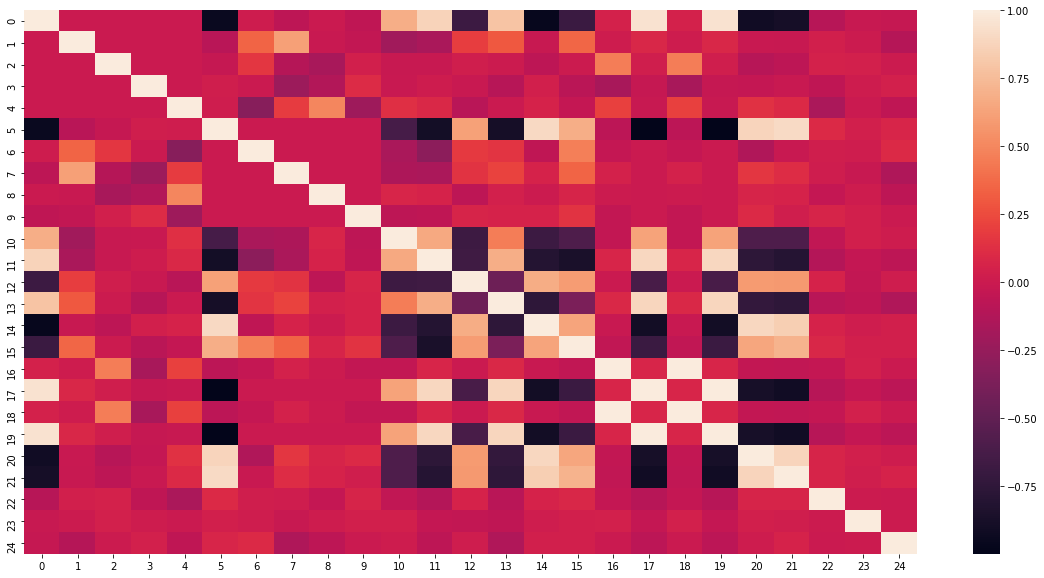

In [15]:
## feature engineering
fe_df = feature_engineering(encoded_df, num_comp=5, num_iter=5)

## select all the feature columns

pca_cols = list(filter(lambda v: re.match('.+_pca', v), fe_df.columns))
stats_cols = list(filter(lambda v: re.match('.+_stats', v), fe_df.columns))
k_means_cols = list(filter(lambda v: re.match('.+_k_mean', v), fe_df.columns))
cat_cols = list(filter(lambda v: re.match('.+_encoded', v), fe_df.columns)) + ['cp_time']
all_cols = pca_cols + stats_cols + k_means_cols + cat_cols
## stack them to a single feature vector
vector_assember_train = VectorAssembler(inputCols=all_cols, outputCol='all_features')
fe_df = vector_assember_train.transform(fe_df)

## Check their correlation
corr_df = get_correlation(fe_df, 0.96, plot=True)
corr_df.dropDuplicates().show()

In [16]:
## 40 PCA columns
## looking for position 3, 6, 7, 8
(stats_cols + k_means_cols + cat_cols)[3]

'c_cols_max_stats'

In [17]:
(stats_cols + k_means_cols + cat_cols)[6]

'g_cols_mean_stats'

In [18]:
(stats_cols + k_means_cols + cat_cols)[7]

'c_cols_mean_stats'

In [19]:
(stats_cols + k_means_cols + cat_cols)[8]

'g_cols_sum_stats'

In [20]:
high_corr_features = ['c_cols_max_stats', 'g_cols_mean_stats', 'c_cols_mean_stats', 'g_cols_sum_stats']

In [21]:
## stack them to a single feature vector again, and remove those features with high correlation
vector_assember_train = VectorAssembler(inputCols=[col for col in all_cols if col not in high_corr_features], outputCol='all_features')
fe_df = vector_assember_train.transform(fe_df.drop('all_features'))

In [22]:
## normalize all the features
normalizer = StandardScaler(withMean=True)
cols = ['all_features']
output_cols = 'features'
fe_df = normalize_features(fe_df, cols, normalizer, output_cols, if_drop=False)

## split train, test df
fe_train = fe_df.filter(fe_df['is_test'] == 0)
final_test = fe_df.filter(fe_df['is_test'] == 1).select(['sig_id', 'features'])

## join training target with training features
labels = target_df.drop('sig_id').columns
final_train = fe_train.join(target_df, ['sig_id']).select(*(['sig_id','features'] + labels))

In [23]:
## train test split
(cv_train, test) = final_train.randomSplit([0.8, 0.2], 16)
(train, validation) = cv_train.randomSplit([0.8, 0.2], 16)

train.cache()
cv_train.cache()
validation.cache()
test.cache()
train_df.unpersist()
test_df.unpersist()
target_df.unpersist()
fe_train.unpersist()
fe_df.unpersist()
final_train.unpersist()
encoded_df.unpersist()
corr_df.unpersist()

DataFrame[correlated_features: array<int>]

In [19]:
## Feature engineering + Feature selection Decision Tree
clf = DecisionTreeClassifier
hyperparameters = [{}] * len(labels)
method = convert_to_array
dt = MultiLabelClassifier(clf, labels, 'features', hyperparameters=hyperparameters, method=method)

In [20]:
dt.fit(train).transform(validation)
print('The score after feature engineering + feature selection for Decision Tree model is : ')
dt.score().show()

206it [05:46,  1.68s/it]
206it [01:33,  2.20it/s]


The score after feature engineering + feature selection for Decision Tree model is : 
+-------------------+
|              score|
+-------------------+
|0.03333891635429162|
+-------------------+



### Model after tuning

Decision Tree, after hyperparameter tuning

Best params are {'maxDepth': 2, 'impurity': 'gini', 'maxBins': 8, 'minInstancesPerNode': 1}

In [25]:
## hyperparameter tuning
clf = DecisionTreeClassifier
grid_map = ParamGridBuilder().addGrid(clf().maxDepth, [2, 4, 7]).addGrid(clf().impurity, ['gini', 'entropy']).addGrid(clf().maxBins, [8, 32, 64]).addGrid(clf().minInstancesPerNode, [1, 8, 16]).build()
method = convert_to_array
dt = MultiLabelClassifier(clf, labels, 'features', method=method)

In [ ]:
best_params = dt.param_search_cv(cv_train, grid_map, 3)

In [ ]:
best_params

In [26]:
clf = DecisionTreeClassifier
method = convert_to_array
hyperparameters = [{'maxDepth': 2, 'impurity': 'gini', 'maxBins': 8, 'minInstancesPerNode': 1}] * len(labels)
final_dt = MultiLabelClassifier(clf, labels, 'features', hyperparameters=hyperparameters, method=method)

In [27]:
final_dt.fit(train).transform(validation)

206it [04:39,  1.36s/it]
206it [01:33,  2.20it/s]


DataFrame[sig_id: string, 5-alpha_reductase_inhibitor: float, 11-beta-hsd1_inhibitor: float, acat_inhibitor: float, acetylcholine_receptor_agonist: float, acetylcholine_receptor_antagonist: float, acetylcholinesterase_inhibitor: float, adenosine_receptor_agonist: float, adenosine_receptor_antagonist: float, adenylyl_cyclase_activator: float, adrenergic_receptor_agonist: float, adrenergic_receptor_antagonist: float, akt_inhibitor: float, aldehyde_dehydrogenase_inhibitor: float, alk_inhibitor: float, ampk_activator: float, analgesic: float, androgen_receptor_agonist: float, androgen_receptor_antagonist: float, anesthetic_-_local: float, angiogenesis_inhibitor: float, angiotensin_receptor_antagonist: float, anti-inflammatory: float, antiarrhythmic: float, antibiotic: float, anticonvulsant: float, antifungal: float, antihistamine: float, antimalarial: float, antioxidant: float, antiprotozoal: float, antiviral: float, apoptosis_stimulant: float, aromatase_inhibitor: float, atm_kinase_inhibi

In [28]:
print(f'The validation score after tuning for Decision Tree model is : ')
final_dt.score().show()

The validation score after tuning for Decision Tree model is : 
+--------------------+
|               score|
+--------------------+
|0.020293238203227204|
+--------------------+



In [29]:
## eval on test set
test_dt =  MultiLabelClassifier(clf, labels, 'features', hyperparameters=hyperparameters, method=method)
test_dt.fit(cv_train).transform(test)

206it [04:29,  1.31s/it]
206it [01:34,  2.19it/s]


DataFrame[sig_id: string, 5-alpha_reductase_inhibitor: float, 11-beta-hsd1_inhibitor: float, acat_inhibitor: float, acetylcholine_receptor_agonist: float, acetylcholine_receptor_antagonist: float, acetylcholinesterase_inhibitor: float, adenosine_receptor_agonist: float, adenosine_receptor_antagonist: float, adenylyl_cyclase_activator: float, adrenergic_receptor_agonist: float, adrenergic_receptor_antagonist: float, akt_inhibitor: float, aldehyde_dehydrogenase_inhibitor: float, alk_inhibitor: float, ampk_activator: float, analgesic: float, androgen_receptor_agonist: float, androgen_receptor_antagonist: float, anesthetic_-_local: float, angiogenesis_inhibitor: float, angiotensin_receptor_antagonist: float, anti-inflammatory: float, antiarrhythmic: float, antibiotic: float, anticonvulsant: float, antifungal: float, antihistamine: float, antimalarial: float, antioxidant: float, antiprotozoal: float, antiviral: float, apoptosis_stimulant: float, aromatase_inhibitor: float, atm_kinase_inhibi

In [30]:
print(f'The test score after tuning for Decision Tree model is : ')
test_dt.score().show()

The test score after tuning for Decision Tree model is : 
+--------------------+
|               score|
+--------------------+
|0.020260023106331515|
+--------------------+

